# Support Vector Classifier & GridSearch

## Import Libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# teste

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

## Get and show the Data

Read the CSV file. The file uses tabs ('\t') as the separator between values in each row.

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

Retrieve the column labels from the dataset.

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Revealing Structure, Data Types, non-null counts, and memory usage.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Method for counting unique values in each column.

In [5]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## Data Transformation

Eliminating Columns: removing the <em>Z_CostContact</em> and <em>Z_Revenue<em/> columns from the DataFrame

In [6]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


Cleaning Rows: eliminates rows containing any missing (NaN) values, ensuring a DataFrame without such incomplete data

In [7]:
data = data.dropna()

Using pd.to_datetime(), the <em>Dt_Customer</em> column, originally stored as an object, is converted to a datetime format. The specified format '%d-%m-%Y' indicates the day-month-year sequence within the <em>Dt_Customer</em> column, reformatting it to a standardized date representation

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

These operations transform the 'data' DataFrame by altering, creating, and refining columns and their contents for better analysis and clarity

In [9]:
data["Age"] = 2023 - data["Year_Birth"]
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"1", "Together":"1","Absurd":"0", "Widow":"0", "YOLO":"0", "Divorced":"0", "Single":"0", "Alone":"0"})
data["Marital_Status"] = data["Marital_Status"].astype('int64')
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})
to_drop = ["Year_Birth","Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data = data.drop(to_drop, axis=1)

Before we transformed the 'data' DataFrame, we had 28 columns with some columns that we would not precisely need to this process, so we rearranged it with the cell above and got
the following info from the DataFrame. We created a column called <em>Age</em>, where we subtracted the year 2023 with the data["Year_Birth"], created another column called <em>Spent</em>  by summing up expenditure columns (<em>MntWines</em>, <em>MntFruits</em>, <em>MntMeatProducts</em>, <em>MntFishProducts</em>, <em>MntSweetProducts</em>, <em>MntGoldProds</em>), representing the overall spent amount, replaced specific categories and converting them into integers (0 or 1) on the column <em>Marital_Status</em>, renamed some columns and eliminated some unwanted columns. With all these changes we got a better understanding of the contents, with a total of 22 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

Here we generate descriptive statistics of the numerical columns in the DataFrame 'data', including count, mean, standard deviation, minimum, maximum and quartile values. This summary helps in understanding the distribution and characteristics of the numerical data

In [11]:
data.describe()

,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,0.645307,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,54.179603,0.947202,607.075361
min,0.000000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000
25%,2814.750000,0.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,0.000000,69.000000
50%,5458.500000,1.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,1.000000,396.500000
75%,8421.750000,1.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1.000000,1048.000000
max,11191.000000,1.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,130.000000,3.000000,2525.000000
std,3249.376275,0.478528,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,0.749062,602.900476


---------------------------------------------

# Support Vector Classifier (SVC)

The **Support Vector Classifier (SVC)** is a machine learning algorithm designed to find the optimal hyperplane for class separation. It excels in both linear and non-linear classification tasks, identifying critical support vectors to determine the decision boundary. However, the presented classification report indicates challenges for the SVC, particularly in achieving high precision and recall for both classes. This suggests potential areas for optimization or consideration of alternative algorithms.

In [12]:
df_feat = data.drop(['Education', 'Dt_Customer', 'Marital_Status'], axis = 1)
df_target = data['Marital_Status']

In [13]:
# Assuming 'Marital_Status' is your target variable
class_distribution = df_target.value_counts()

# Print the counts for each class
print(class_distribution)

Marital_Status
1    1430
0     786
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.50,random_state=2022)

In [15]:
cross_valid_model = SVC(random_state=2022)
scores = cross_val_score(cross_valid_model, df_feat, df_target, cv=10)
scores

array([0.64414414, 0.64414414, 0.64414414, 0.64414414, 0.64414414,
       0.64414414, 0.64705882, 0.64705882, 0.64705882, 0.64705882])

In [16]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.00


In [17]:
# Example with class_weight parameter
svc_model = SVC(random_state=2023, class_weight='balanced')

In [18]:
svc_model.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=2023)

In [19]:
svc_predictions = svc_model.predict(X_test)
svc_predictions

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [20]:
print("%0.2f accuracy" % (accuracy_score(y_test, svc_predictions)))

0.51 accuracy


In [21]:
print("Classification Report:")
print(classification_report(y_test,svc_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       380
           1       0.64      0.59      0.61       728

    accuracy                           0.51      1108
   macro avg       0.48      0.48      0.48      1108
weighted avg       0.53      0.51      0.52      1108



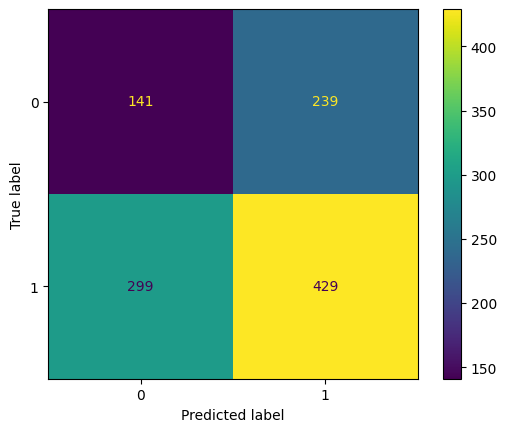

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,svc_predictions)
plt.show()

Precision and Recall for Class 0:
- **Precision** (the proportion of true positives among all predicted positives) for class 0 is relatively low (0.32), suggesting that when the model predicts instances as class 0, it is correct about 32% of the time.
- **Recall** (the proportion of true positives identified among all actual positives) for class 0 is also relatively low (0.37), indicating that the model is capturing only 37% of the actual instances of class 0.

Precision and Recall for Class 1:
- **Precision** for class 1 is higher (0.64), indicating that when the model predicts instances as class 1, it is correct about 64% of the time.
- **Recall** for class 1 is also relatively high (0.59), suggesting that the model is capturing about 59% of the actual instances of class 1.

---------------------------------------------------

# GridSearch with Random Forest Classifier

**GridSearch with Random Forest Classifier** involves using <u>GridSearchCV</u>, a hyperparameter tuning technique, to find the best hyperparameters for the Random Forest Classifier model. Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes for predictions. In the provided classification report, the Random Forest Classifier tuned through GridSearch demonstrates significant improvements over the standalone SVC. It achieves a better balance between precision and recall for both classes, highlighting the effectiveness of systematic hyperparameter tuning in enhancing model performance.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.25, random_state=2023)

In [24]:
gs_model = RandomForestClassifier(class_weight='balanced', random_state=2023)

In [25]:
gs_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2023)

In [26]:
gs_predictions = gs_model.predict(X_test)

In [27]:
print("Classification Report:")
print(classification_report(y_test, gs_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.15      0.25       202
           1       0.66      0.95      0.78       352

    accuracy                           0.66       554
   macro avg       0.64      0.55      0.51       554
weighted avg       0.65      0.66      0.58       554



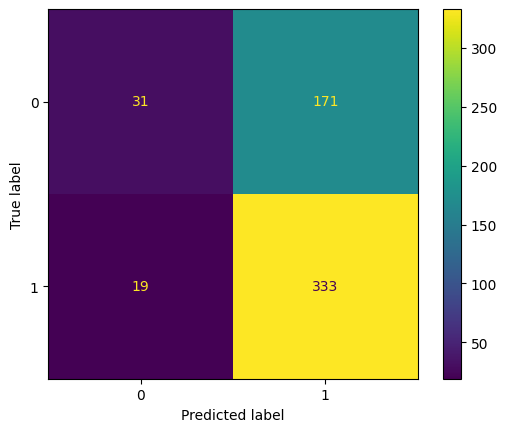

In [28]:
ConfusionMatrixDisplay.from_estimator(gs_model, X_test, y_test, display_labels=df_target.unique())
plt.show()

Precision and Recall for Class 0:
- **Precision** (the proportion of true positives among all predicted positives) for class 0 is medium (0.62), suggesting that when the model predicts instances as class 0, it is correct about 62% of the time.
- **Recall** (the proportion of true positives identified among all actual positives) for class 0 is low (0.15), indicating that the model is capturing only 15% of the actual instances of class 0.

Precision and Recall for Class 1:
- **Precision** for class 1 is relatively higher (0.66), indicating that when the model predicts instances as class 1, it is correct about 66% of the time.
- **Recall** for class 1 is also high (0.95), suggesting that the model is capturing about 95% of the actual instances of class 1.

-------------------------

# Conclusion

The **GridSearch with Random Forest Classifier** appears to be a more effective model for this classification task, providing a better balance between <u>precision</u> and <u>recall</u>, especially when dealing with imbalanced classes. Further tuning and optimization could potentially enhance the performance of either model.